<center><h1>In your face:<br>Biased judgement of fear-anger expressions in violence offenders.</h1></center>

# 1. Questionnaire Data

This is an anlaysis of the [AFAS](http://www.researchgate.net/publication/270567168_Combat_high_or_traumatic_stress_Violent_offending_is_associated_with_appetitive_aggression_but_not_with_symptoms_of_traumatic_stress), PPI-R and SCID-II scores of the participants.  

### import modules

In [1]:
import numpy as np
from scipy import stats
import pandas as pd

import os
import fnmatch

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from myBasics import *

In [2]:
# Sebastian Raschka; https://github.com/rasbt/watermark/blob/master/docs/watermark.ipynb
%load_ext watermark
%watermark -v -m -d -u -p python,numpy,scipy,pandas,matplotlib,seaborn -g

last updated: 2016-03-11 

CPython 2.7.11
IPython 4.0.3

python 2.7.11
numpy 1.10.4
scipy 0.17.0
pandas 0.17.1
matplotlib 1.5.1
seaborn 0.7.0

compiler   : GCC 4.4.7 20120313 (Red Hat 4.4.7-1)
system     : Linux
release    : 3.13.0-79-generic
machine    : x86_64
processor  : x86_64
CPU cores  : 8
interpreter: 64bit
Git hash   : 52c1b2a9682cd1e92f49969c45b9c8b8e1c39e82


# AFAS

### Overview of the questions the AFAS contains

In [3]:
for entry in open('../experiment/quest/app/forms.py','r'):
    if 'u"' in entry:
        print entry[entry.find('u"')+2:-3]

1. Traten Sie aus Frust einen Gegenstand oder warfen ihn umher?
2. Fanden Sie Sportarten aufregender, in denen Blut floss?
3. Waren Sie so gereizt, dass Sie sich an anderen Menschen abreagierten?
4. Wollten Sie jemanden noch mehr einschüchtern, wenn Sie merkten, dass diese Person Angst vor Ihnen hatte?
5. Schlugen Sie aus Ärger so fest auf den Tisch, dass Ihnen die Faust danach weh tat?
6. Wollten Sie möglichst vor Ort sein, wenn Sie von einem grausamen Ereignis hörten?
7. Provozierten Sie andere, einfach weil es Ihnen Spaß machte?
8. Wenn Sie wütend auf jemanden waren, malten Sie sich schlimme Dinge aus, die der betreffenden Person zustoßen könnten?
9. Schauten Sie einer Schlägerei zu, auch wenn Sie sich selbst dabei in Gefahr gebracht haben?
10. Rutschte Ihnen die Hand aus, weil jemand Sie provozierte?
11. Machte es Ihnen Spaß, sich zu prügeln?
12. Wenn Sie sich bedroht fühlten, ging es Ihnen besser, wenn Sie sich vorstellten der betreffenden Person zu schaden?
13. Gewöhnten Sie sich

### find all files

In [4]:
def get_logfile(whichfolder, whichexperiment):

    loglist = []
    for fileName in os.listdir(whichfolder):
        if fnmatch.fnmatch(fileName, whichexperiment):
            loglist.append(whichfolder+fileName)
    return loglist

In [5]:
loglist = get_logfile('../experiment/quest/app/static/logfiles/','log*.txt')
loglist.sort()

Example:

In [6]:
loglist[:5]

['../experiment/quest/app/static/logfiles/logfile_A1.txt',
 '../experiment/quest/app/static/logfiles/logfile_A10.txt',
 '../experiment/quest/app/static/logfiles/logfile_A11.txt',
 '../experiment/quest/app/static/logfiles/logfile_A12.txt',
 '../experiment/quest/app/static/logfiles/logfile_A13.txt']

### get data of one participant

In [7]:
def makeThis(logfile):

    pName = logfile[logfile.find('_')+1:logfile.rfind('.')]
    pName = pName[0] + ('000'+ pName[1:])[-3:]
    
    fullDf = pd.read_csv(logfile,
                         skiprows=2,
                         index_col=[0]
                        )
    
    fullDf.index = [[pName]*len(fullDf.index),fullDf.index]
    fullDf.index.names = ['id', 'f']
    fullDf.columns = ['ans']
    
    withinDf = fullDf.unstack(1)
    
    # sort columns
    newCols = []
    for entry in withinDf.columns.levels[1]:
        newName = '00'+str(entry[1:])
        newCols.append('f'+newName[-3:])
    withinDf.columns = newCols
    withinDf = withinDf.reindex_axis(sorted(withinDf.columns), axis=1)
    
    return withinDf

Example:

In [8]:
makeThis(loglist[-1])

,f001,f002,f003,f004,f005,f006,f007,f008,f009,f010,...,f021,f022,f023,f024,f025,f026,f027,f028,f029,f030
id,,,,,,,,,,,,,,,,,,,,,
K009,1,0,0,2,0,0,0,1,1,1,...,1,0,1,0,1,0,1,0,1,1


### get data of all participants

In [9]:
def makeAll(loglist):
    
    for p in loglist:
        thisDf = makeThis(p)
        try:
            bigDf = pd.concat([bigDf,thisDf])
            
        except:
            bigDf = thisDf
    
    group = [a[0] for a in bigDf.index]
    
    bigDf.index = [group,bigDf.index]
    bigDf = bigDf.sort_index(axis=0,level=1)
    
    return bigDf

In [10]:
bigDf = makeAll(loglist)

The final DataFrame:

In [11]:
bigDf.head()

f001  f002  f003  f004  f005  f006  f007  f008  f009  f010  ...   \
  id                                                                ...    
A A001     1     0     1     0     1     0     0     0     0     1  ...    
  A002     1     0     0     0     1     0     1     0     0     0  ...    
  A003     2     0     0     0     1     0     1     0     1     1  ...    
  A004     0     0     0     1     0     0     2     1     0     0  ...    
  A005     3     0     1     3     2     3     1     4     4     0  ...    

        f021  f022  f023  f024  f025  f026  f027  f028  f029  f030  
  id                                                                
A A001     1     0     2     0     0     1     1     0     2     0  
  A002     0     0     1     0     0     0     0     0     0     0  
  A003     1     0     1     0     0     0     0     0     0     2  
  A004     0     0     1     0     0     0     1     0     0     0  
  A005     0     0     1     0     0     3     1     1     2     3  

[5 rows x 30 columns]

### Export as CSV for re-use

In [12]:
bigDf.to_csv('../outputs/fullAFAS.csv')

Example of re-importing:

In [13]:
pd.read_csv('../outputs/fullAFAS.csv',
            index_col =[0,1]).head()

f001  f002  f003  f004  f005  f006  f007  f008  f009  f010  ...   \
  id                                                                ...    
A A001     1     0     1     0     1     0     0     0     0     1  ...    
  A002     1     0     0     0     1     0     1     0     0     0  ...    
  A003     2     0     0     0     1     0     1     0     1     1  ...    
  A004     0     0     0     1     0     0     2     1     0     0  ...    
  A005     3     0     1     3     2     3     1     4     4     0  ...    

        f021  f022  f023  f024  f025  f026  f027  f028  f029  f030  
  id                                                                
A A001     1     0     2     0     0     1     1     0     2     0  
  A002     0     0     1     0     0     0     0     0     0     0  
  A003     1     0     1     0     0     0     0     0     0     2  
  A004     0     0     1     0     0     0     1     0     0     0  
  A005     0     0     1     0     0     3     1     1     2     3  

[5 rows x 30 columns]

## Get avarage scores for each participant

Facilitative Aggression:
Items 1,3,5,8,10,12,14,17,19,21,23,25,27,29,30

Appetitive Aggression:
Items 2,4,6,7,9,11,13,15,16,18,20,22,24,26,28


In [14]:
fAgr=np.array([1,3,5,8,10,12,14,17,19,21,23,25,27,29,30])-1 # because we start counting from zero, we subtract 1
aAgr=np.array([2,4,6,7,9,11,13,15,16,18,20,22,24,26,28])-1

print fAgr
print aAgr

[ 0  2  4  7  9 11 13 16 18 20 22 24 26 28 29]
[ 1  3  5  6  8 10 12 14 15 17 19 21 23 25 27]


Example: facilitative aggression

In [15]:
bigDf[bigDf.columns[fAgr]].head()

f001  f003  f005  f008  f010  f012  f014  f017  f019  f021  f023  \
  id                                                                       
A A001     1     1     1     0     1     2     1     1     1     1     2   
  A002     1     0     1     0     0     0     0     0     1     0     1   
  A003     2     0     1     0     1     1     0     0     0     1     1   
  A004     0     0     0     1     0     0     0     1     0     0     1   
  A005     3     1     2     4     0     3     0     1     0     0     1   

        f025  f027  f029  f030  
  id                            
A A001     0     1     2     0  
  A002     0     0     0     0  
  A003     0     0     0     2  
  A004     0     1     0     0  
  A005     0     1     2     3

In [16]:
def makeMean(df,fAgr=fAgr,aAgr=aAgr,labelCoding=labelCoding):
    # get the mean on both scales
    meanF = df[df.columns[fAgr]].T.mean()
    meanA = df[df.columns[aAgr]].T.mean()
    # get the overall mean
    meanBig = df.T.mean()
    
    assert meanBig.all() == ((meanA+meanF)/2.).all() , 'mean values corrupted; please check'
    
    # put them in one df
    meanDf = pd.DataFrame([meanF,meanA,meanBig]).T
    # structure the df
    meanDf['group'] = [ labelCoding[x[0]] for x in meanDf.index.levels[1] ]
    meanDf.columns = ['Facilitative','Appetitive','Overall','group']
    meanDf = meanDf.sort_index()
   
    return meanDf

In [17]:
meanDf = makeMean(bigDf)

In [18]:
meanDf.head()

Facilitative  Appetitive   Overall  group
  id                                             
A A001      1.000000    0.266667  0.633333      2
  A002      0.266667    0.066667  0.166667      2
  A003      0.600000    0.200000  0.400000      2
  A004      0.266667    0.200000  0.233333      2
  A005      1.400000    1.200000  1.300000      2

### Save for re-use:

In [19]:
meanDf.to_csv('../outputs/meanAFAS.csv')

## Plot of the results

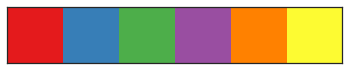

In [20]:
sns.palplot(myPal)

In [21]:
sortDf = meanDf.sort_values('group')

In [22]:
sortDf.tail()

Facilitative  Appetitive   Overall  group
  id                                             
A A014      1.000000    0.533333  0.766667      2
  A015      0.200000    0.066667  0.133333      2
  A016      0.133333    0.200000  0.166667      2
  A010      0.600000    0.200000  0.400000      2
  A001      1.000000    0.266667  0.633333      2

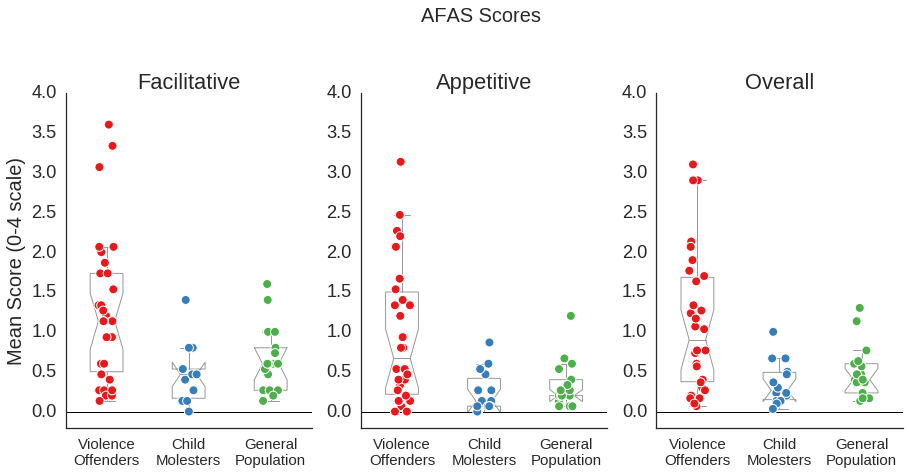

In [23]:
fig = plt.figure(figsize=(15,6))

for i,metric in enumerate(meanDf.columns[:-1]):
    
    ax = fig.add_subplot(int('13'+str(i+1)))

    sns.boxplot(x='group',y=metric,data=sortDf,
                width=0.4,linewidth=1,color='white',whis=True,notch=True,fliersize=0,ax=ax)

    sns.stripplot(x='group', y=metric, data=sortDf,
                  jitter=True, edgecolor='white',palette=myPal,size=9,linewidth=1,ax=ax)

    ax.axhline(0,color='k',linewidth=1)
    ax.set_title(metric)
    
    ax.set_xticklabels(['Violence\nOffenders','Child\nMolesters','General\nPopulation'],fontsize=15)
    #ax.set_xticks(range(3),['Violence\nOffenders','Child\nMolesters','General\nPopulation'])
    ax.set_xlabel('')
    if i ==  0: 
        ax.set_ylabel('Mean Score (0-4 scale)')
    else:
        ax.set_ylabel('')
    ax.set_ylim(-0.2,4)
    sns.despine()
    
plt.suptitle('AFAS Scores',fontsize=20, position=(0.51,1.1))
# save to file
plt.savefig('../figures/afasFig.png',dpi=300) 
# show in notebook
plt.show()

### Inferential statistics

In [26]:
def makeUTests(df):
    bigDf = pd.DataFrame()
    d = {}
    for comp in [('G','K'),('G','A'),('K','A')]:
        for variable in df.columns[:-1]:
            group1 = df.ix[comp[0]][variable]
            group2 = df.ix[comp[1]][variable]
            U,p = stats.mannwhitneyu(group1,group2)
            if p<0.05:
                thisSig = '*'
            else:
                thisSig = 'n.s.'
            d[variable] = {'U':round(U,2),'p':round(p,3),'sig':thisSig}
        thisDf = pd.DataFrame(d)
        thisDf = thisDf.reindex_axis(['U','p','sig'], axis=0)
        thisDf.index = [ [comp[0]+' > '+comp[1]]*len(thisDf.index),thisDf.index ]

        bigDf = pd.concat([bigDf,thisDf])
    return bigDf.T

In [27]:
makeUTests(meanDf)

G > K             G > A            K > A             
                  U      p sig      U      p sig     U      p   sig
Appetitive    322.5  0.005   *    360   0.02   *    90  0.253  n.s.
Facilitative    329  0.003   *  357.5  0.024   *    80  0.125  n.s.
Overall         331  0.002   *  362.5  0.018   *    89  0.241  n.s.

### Investigating how the subscales correlate with other

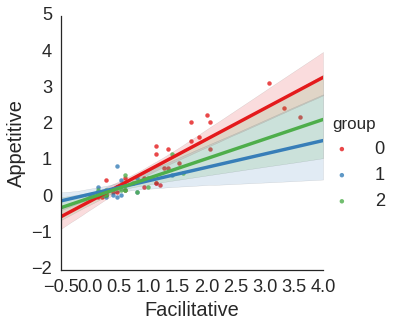

In [28]:
# Draw a categorical scatterplot to show each observation
sns.lmplot(x="Facilitative", y="Appetitive", hue="group", data=sortDf,palette=myPal);

# PPI-R

In [30]:
ppiDf = pd.read_csv('../experiment/ppi_r.csv',
                   index_col=[0,1])

ppiDf['group'] = [ labelCoding[x[0]] for x in ppiDf.index.levels[1]]
ppiDf = ppiDf.replace(-99,np.nan)
ppiDf = ppiDf.dropna()
ppiDf = ppiDf

In [31]:
ppiDf.head()

Blame externalization  Rebellious nonconformity  Stress immunity  \
  id                                                                       
A A001                     18                        57               46   
  A002                     22                        41               46   
  A003                     34                        56               37   
  A004                     19                        46               51   
  A005                     45                        82               37   

        Social influence  Coldheartedness  Machiavellian egocentricity  \
  id                                                                     
A A001                53               27                           35   
  A002                46               30                           32   
  A003                46               32                           31   
  A004                34               38                           32   
  A005                37               37                           46   

        Carefree nonplanfulness  Fearlessness  sum_ppi_r  insincerity  group  
  id                                                                          
A A001                       24            25        285           53      2  
  A002                       30             9        256           43      2  
  A003                       30            24        290           41      2  
  A004                       22            18        260           47      2  
  A005                       38            27        349           31      2

In [32]:
ppiDf.to_csv('../outputs/ppiDf.csv')

In [34]:
def makeBoxPlot(df):
    fig = plt.figure(figsize=(15,8))

    sortDf = df.sort_values('group')
    
    myColumns = df.columns[:-1]
    numColumns = len(myColumns)
    
    for i,metric in enumerate(myColumns):

        ax = fig.add_subplot(2,numColumns/2.,i+1)

        sns.boxplot(x='group',y=metric,data=sortDf,
                    width=0.4,linewidth=1,color='white',whis=True,notch=True,fliersize=0,ax=ax)

        sns.stripplot(x='group', y=metric, data=sortDf,
                      jitter=True, edgecolor='white',palette=myPal,ax=ax)

        ax.set_title(metric,fontsize=15)

        ax.set_xticklabels(['Violence\nOffenders','Child\nMolesters','General\nPopulation'],fontsize=9)
        ax.set_xlabel('')
        if i%5 ==  0: 
            ax.set_ylabel('Sum Score',fontsize=15)
        else:
            ax.set_ylabel('')
        #ax.set_ylim(-0.2,4)
        sns.despine()

    plt.suptitle('PPI-R Scores',fontsize=20, position=(0.51,1.02))
    # save to file
    #plt.savefig('../figures/afasFig.png',dpi=300) 
    # show in notebook
    plt.tight_layout()
    plt.show()

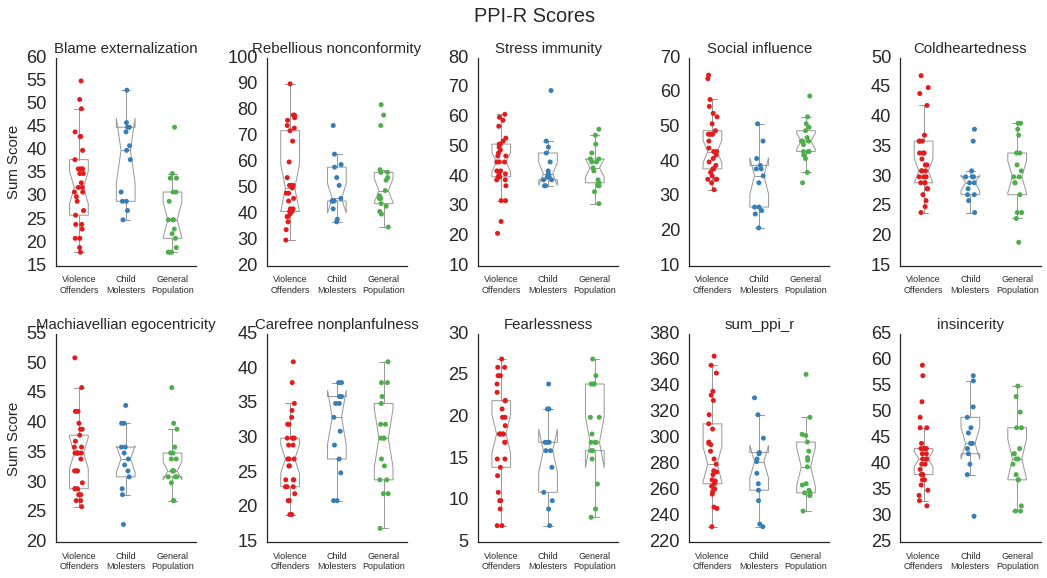

In [35]:
makeBoxPlot(ppiDf)

### Inferential statistics

In [36]:
makeUTests(ppiDf)

G > K               G > A               K > A  \
                                 U      p   sig      U      p   sig      U   
Blame externalization          132  0.127  n.s.    349   0.02     *  182.5   
Carefree nonplanfulness        120  0.064  n.s.  195.5  0.249  n.s.  124.5   
Coldheartedness              254.5  0.074  n.s.  284.5  0.392  n.s.     94   
Fearlessness                   241  0.156  n.s.  246.5  0.991  n.s.   78.5   
Machiavellian egocentricity    193  0.913  n.s.    272  0.568  n.s.    121   
Rebellious nonconformity       203  0.703  n.s.  237.5  0.847  n.s.    102   
Social influence               294  0.004     *    220  0.553  n.s.     34   
Stress immunity                212  0.531  n.s.  285.5   0.38  n.s.    117   
insincerity                  121.5   0.07  n.s.    249  0.964  n.s.  145.5   
sum_ppi_r                      219  0.414  n.s.  289.5  0.333  n.s.    108   

                                          
                                 p   sig  
Blame externalization        0.003     *  
Carefree nonplanfulness      0.571  n.s.  
Coldheartedness              0.501  n.s.  
Fearlessness                 0.185  n.s.  
Machiavellian egocentricity  0.674  n.s.  
Rebellious nonconformity     0.737  n.s.  
Social influence             0.001     *  
Stress immunity              0.801  n.s.  
insincerity                  0.148  n.s.  
sum_ppi_r                    0.933  n.s.

# SCID-II

In [37]:
scidDf = pd.read_csv('../experiment/scid_ii.csv',
                   index_col=[0,1])

scidDf['group'] = [ labelCoding[x[0]] for x in scidDf.index.levels[1]]
scidDf = scidDf.replace(-99,np.nan)
scidDf = scidDf.dropna()
scidDf = scidDf[:-1]

In [38]:
scidDf.to_csv('../outputs/scidDf.csv')

In [39]:
scidDf.tail()

scid_sel  scid_dep  scid_ocd  scid_neg  scid_par  scid_sct  scid_sci  \
  id                                                                           
K K009         0         2         6         2         2         1         1   
  K010         5         7         7         7         8         7         4   
  K011         1         0         3         0         1         0         1   
  K012         2         2         2         2         5         7         1   
  K013         4         3         5         0         4         2         2   

        scid_his  scid_nar  scid_bor  scid_ant  group  
  id                                                   
K K009         2         7         2         3      1  
  K010         0        11        10         7      1  
  K011         0         1         0         0      1  
  K012         0         2         3         0      1  
  K013         1         4         0         2      1

In [40]:
def makeScidPlot(df):
    fig = plt.figure(figsize=(15,9))
    sns.set_style('ticks')

    sortDf = df.sort_values('group')
    
    myColumns = df.columns[:-1]
    numColumns = len(myColumns)
    
    for i,metric in enumerate(myColumns):

        ax = fig.add_subplot(3,4,i+1)

        sns.boxplot(x='group',y=metric,data=sortDf,
                    width=0.4,linewidth=1,color='white',whis=True,notch=True,fliersize=0,ax=ax)

        sns.stripplot(x='group', y=metric, data=sortDf,
                      jitter=True, edgecolor='white',palette=myPal,ax=ax)

        ax.set_title(metric)

        ax.set_xticklabels(['Violence\nOffenders','Child\nMolesters','General\nPopulation'],fontsize=9)
        #ax.set_xticks(range(3),['Violence\nOffenders','Child\nMolesters','General\nPopulation'])
        ax.set_xlabel('')
        if i%4 ==  0: 
            ax.set_ylabel('Sum Score',fontsize=15)
        else:
            ax.set_ylabel('')
        #ax.set_ylim(-0.2,4)
        sns.despine()
    plt.suptitle('SCID-II',fontsize=20, position=(0.51,1.02))
    # save to file
    #plt.savefig('../figures/afasFig.png',dpi=300) 
    # show in notebook
    plt.tight_layout()
    plt.show()

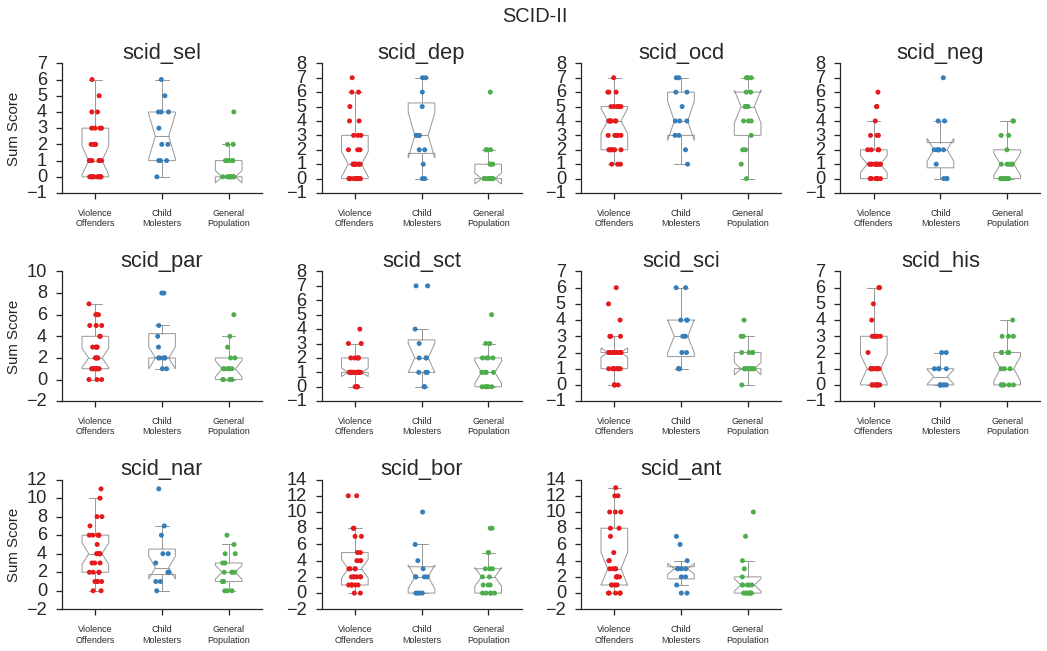

In [41]:
makeScidPlot(scidDf)

### inferential statistics

In [42]:
makeUTests(scidDf)

G > K               G > A               K > A             
              U      p   sig      U      p   sig      U      p   sig
scid_ant  195.5  0.544  n.s.  351.5  0.016     *  140.5  0.085  n.s.
scid_bor  214.5  0.246  n.s.    307  0.168  n.s.  102.5      1  n.s.
scid_dep    115  0.088  n.s.  326.5  0.058  n.s.    165  0.004     *
scid_his    226  0.122  n.s.    253  0.888  n.s.     70  0.143  n.s.
scid_nar    198  0.497  n.s.    348   0.02     *    129  0.234  n.s.
scid_neg    143   0.37  n.s.    282  0.408  n.s.  131.5  0.185  n.s.
scid_ocd    134  0.251  n.s.  188.5  0.185  n.s.    100  0.946  n.s.
scid_par  142.5  0.366  n.s.  345.5  0.022     *    163  0.006     *
scid_sci  103.5  0.039     *  273.5  0.528  n.s.    154  0.017     *
scid_sct  122.5  0.118  n.s.  243.5  0.952  n.s.  128.5  0.238  n.s.
scid_sel  105.5  0.047     *  309.5  0.134  n.s.  168.5  0.002     *